Импортируем файлы и библиотеки

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
sns.set(style="whitegrid", palette="pastel")
df = pd.read_csv("../data/_data.csv")
df = df.drop(columns=["Unnamed: 0"])

Сводные таблицы

In [5]:
df.head(5)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23368 entries, 0 to 23367
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID  объявления            23368 non-null  int64  
 1   Количество комнат         22327 non-null  object 
 2   Тип                       23368 non-null  object 
 3   Метро                     22053 non-null  object 
 4   Адрес                     23368 non-null  object 
 5   Площадь, м2               23368 non-null  object 
 6   Дом                       23368 non-null  object 
 7   Парковка                  9951 non-null   object 
 8   Цена                      23368 non-null  object 
 9   Телефоны                  23368 non-null  object 
 10  Описание                  23368 non-null  object 
 11  Ремонт                    20613 non-null  object 
 12  Площадь комнат, м2        14458 non-null  object 
 13  Балкон                    15390 non-null  object 
 14  Окна  

,ID объявления,"Высота потолков, м"
count,2.336800e+04,11206.00000
mean,2.676265e+08,2.98345
std,1.876862e+07,7.61472
min,1.072986e+08,1.20000
25%,2.712663e+08,2.64000
50%,2.739030e+08,2.64000
75%,2.746872e+08,2.80000
max,2.750064e+08,320.00000


Типы данных

In [6]:
df.dtypes.value_counts()

object     22
int64       1
float64     1
Name: count, dtype: int64

Уникальные значения

In [24]:
df.map(type).nunique()


ID  объявления              1
Количество комнат           2
Тип                         1
Метро                       2
Адрес                       1
Площадь, м2                 1
Дом                         1
Парковка                    2
Цена                        1
Телефоны                    1
Описание                    1
Ремонт                      2
Площадь комнат, м2          2
Балкон                      2
Окна                        2
Санузел                     2
Можно с детьми/животными    2
Дополнительно               2
Название ЖК                 2
Серия дома                  2
Высота потолков, м          1
Лифт                        2
Мусоропровод                2
Ссылка на объявление        1
Площадь м2 числ             1
dtype: int64

Числовые значения

In [8]:
numeric = df.select_dtypes(include='number')
numeric

,ID объявления,"Высота потолков, м"
0,271271157,3.00
1,271634126,3.50
2,271173086,3.20
3,272197456,3.20
4,273614615,3.90
...,...,...
23363,215565511,NaN
23364,274654844,NaN
23365,268679909,NaN
23366,274807525,2.65


Проверим на пропуски

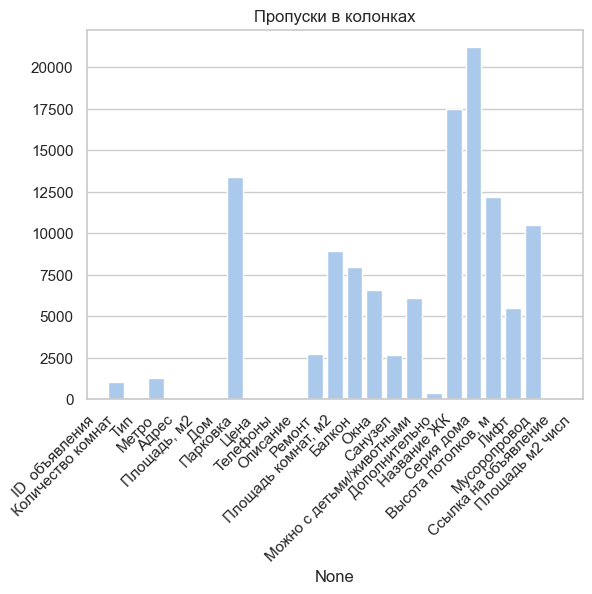

In [20]:
missed = df.isna().sum()
fig, ax = plt.subplots()
sns.barplot(x=missed.index, y=missed.values)
ax.set_title('Пропуски в колонках')
plt.xticks(rotation=45, ha='right');

Корреляция между признаками (числовыми и категориальными)

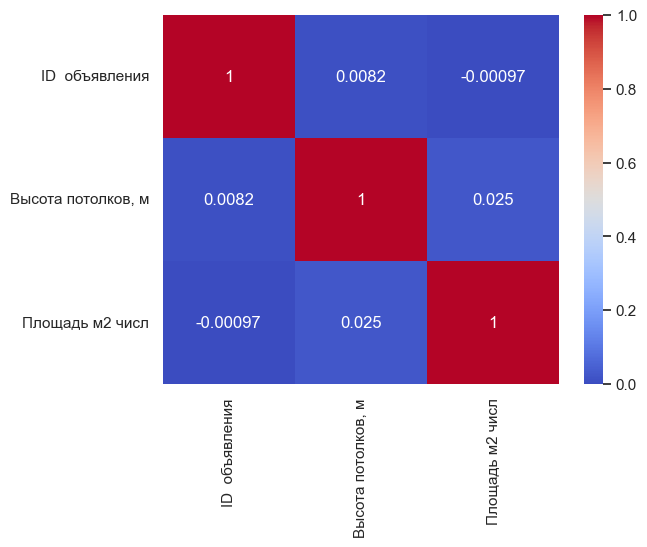

In [21]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm');

Сколько уникальных в каждой колонке

In [11]:
df.nunique(dropna=False).sort_values(ascending=False)

ID  объявления              23368
Ссылка на объявление        23368
Описание                    23078
Телефоны                    13172
Адрес                       12850
Площадь, м2                 11255
Метро                        5867
Площадь комнат, м2           3991
Цена                         3922
Дом                          2565
Название ЖК                  1799
Дополнительно                 529
Серия дома                    394
Высота потолков, м             96
Лифт                           35
Количество комнат              25
Санузел                        21
Балкон                         19
Парковка                        6
Ремонт                          5
Можно с детьми/животными        4
Окна                            4
Мусоропровод                    3
Тип                             1
dtype: int64

Тип можем удалить так не повлияет на наш анализ 

Общая информация по колнкам

In [12]:
pd.DataFrame({
    "Тип данных": df.dtypes,
    "Кол-во значений": df.count(),
    "Пропуски (шт.)": df.isna().sum(),
    "Пропуски (%)": (df.isna().mean() * 100).round(2),
    "Уникальных значений": df.nunique(),
    "Частое значение": df.mode().iloc[0]
})


,Тип данных,Кол-во значений,Пропуски (шт.),Пропуски (%),Уникальных значений,Частое значение
ID объявления,int64,23368,0,0.00,23368,107298592
Количество комнат,object,22327,1041,4.45,24,1
Тип,object,23368,0,0.00,1,Квартира
Метро,object,22053,1315,5.63,5866,м. Академическая (10 мин пешком)
Адрес,object,23368,0,0.00,12850,"Москва, Чапаевский переулок, 3"
"Площадь, м2",object,23368,0,0.00,11255,40.0/20.0/10.0
Дом,object,23368,0,0.00,2565,"3/5, Кирпичный"
Парковка,object,9951,13417,57.42,5,наземная
Цена,object,23368,0,0.00,3922,"40000.0 руб./ За месяц, Залог - 40000 руб., Ко..."
Телефоны,object,23368,0,0.00,13172,+79819217172


Визуализация вариантивности значений в колонках с мин.колл-вом значений.

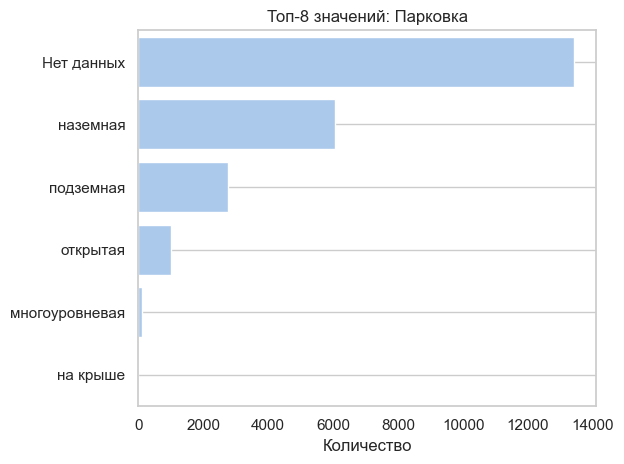

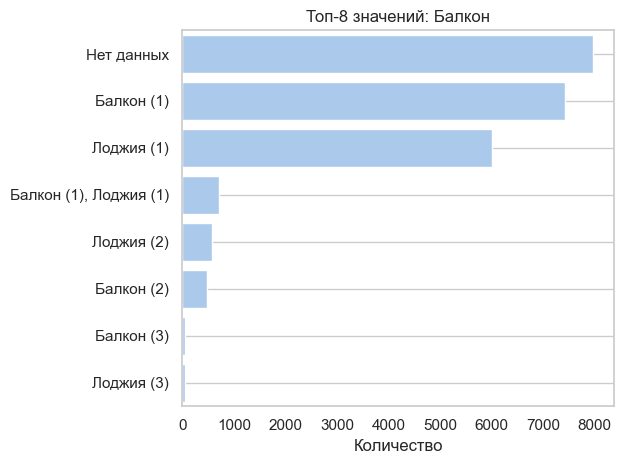

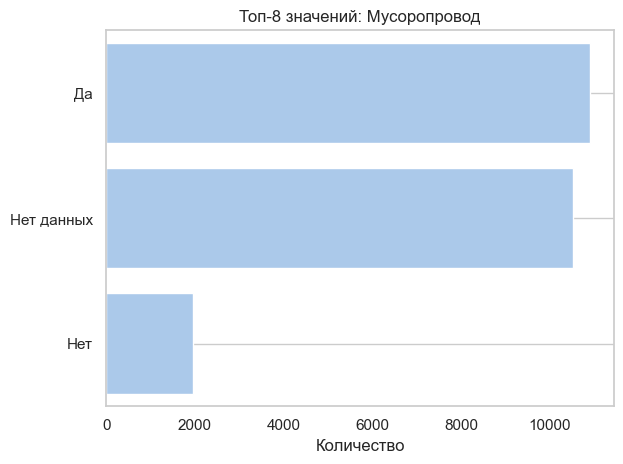

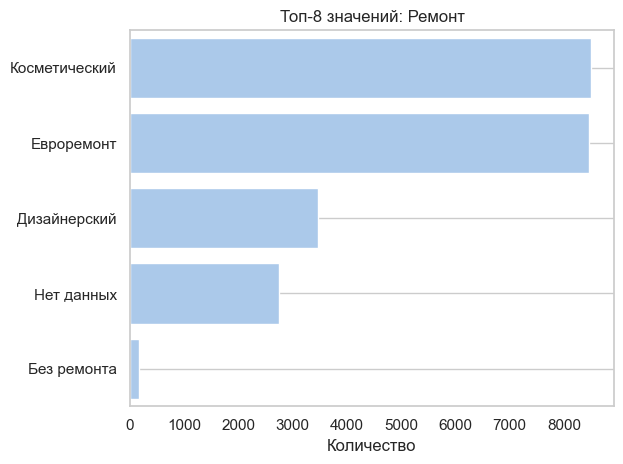

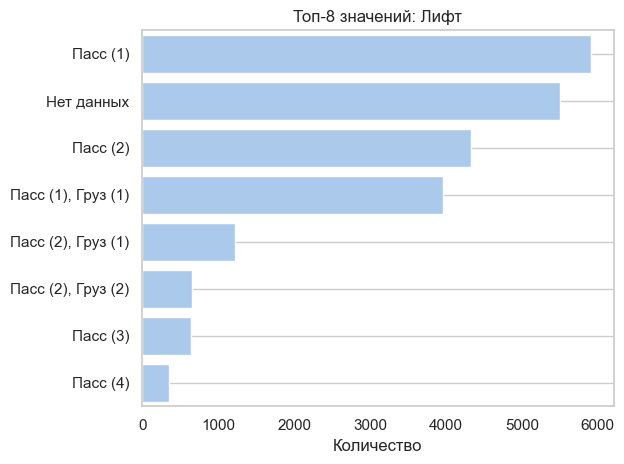

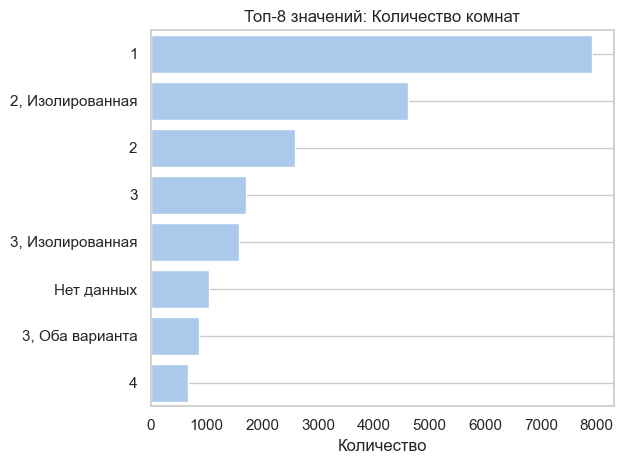

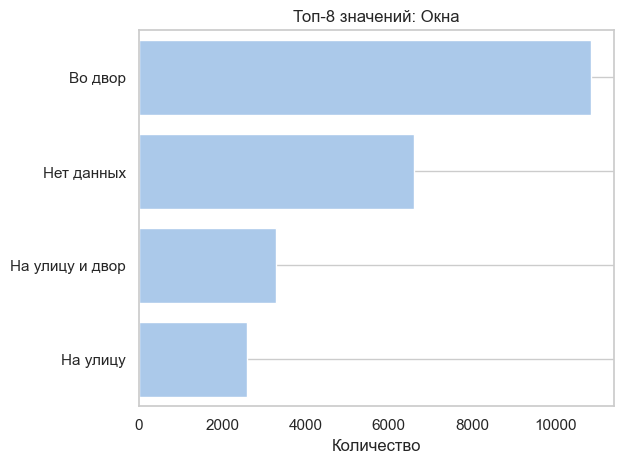

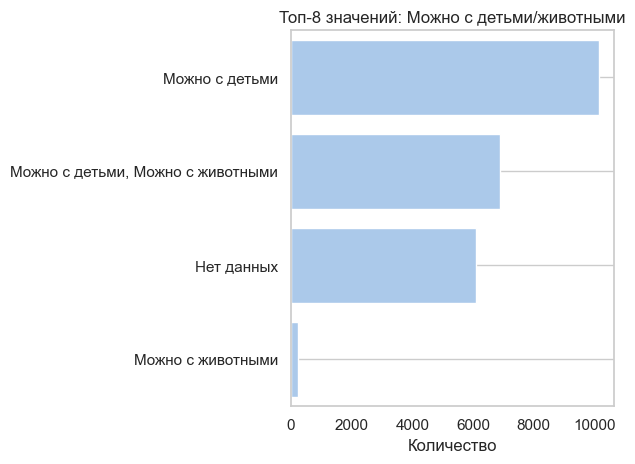

In [13]:
var_cols = ["Парковка", "Балкон", "Мусоропровод", "Ремонт", "Лифт", 'Количество комнат', "Окна", "Можно с детьми/животными"]

#plt.figure(figsize=(12, 4 * len(var_cols)))

for i, col in enumerate(var_cols, 1):
    #plt.subplot(len(var_cols), 1, i)
    plt.figure()

    counts = df[col].fillna("Нет данных").value_counts().head(8)

    sns.barplot(x=counts.values, y=counts.index)
    plt.title(f"Топ-8 значений: {col}")
    plt.xlabel("Количество")
    plt.ylabel("")
    plt.grid()
    plt.tight_layout()

plt.show()

Вид дома не корректнотно отображался, т.к не было разделения по запятой

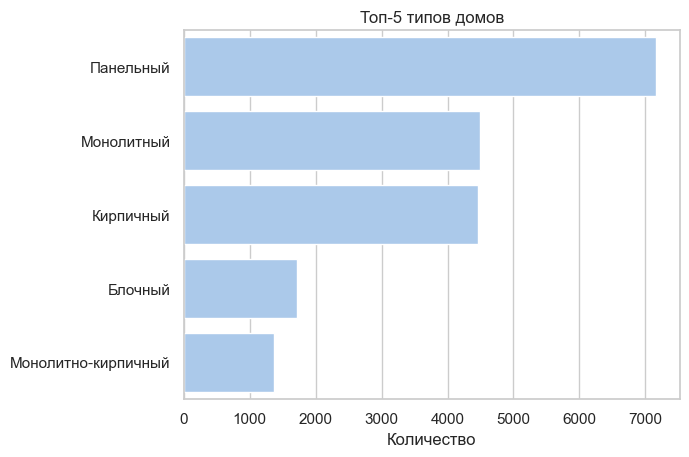

In [14]:
counts = df['Дом'].str.split(',').str[-1].str.strip().value_counts().head(5)

sns.barplot(x=counts.values, y=counts.index)
plt.title('Топ-5 типов домов')
plt.xlabel('Количество')
plt.ylabel('')
plt.show()

Тут наглядно можем посомтреть какие колонки нужно будет перевести в числовой формат, какие можем удалить, в каких корректнее выбрать моду или медиану.

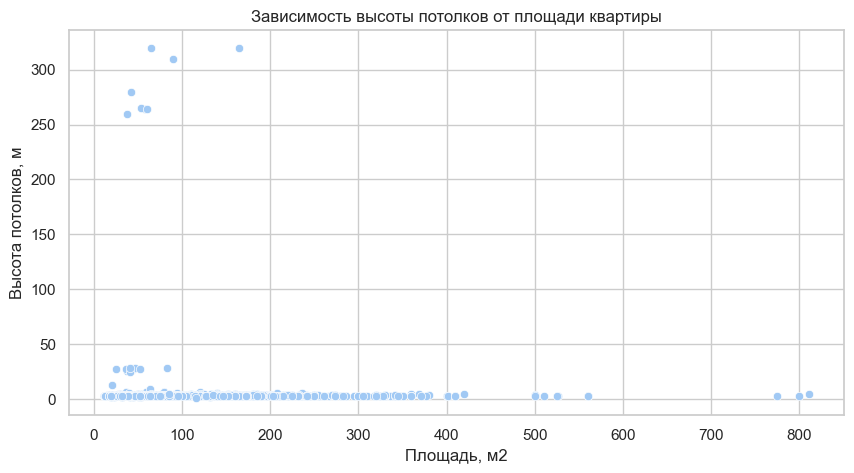

In [15]:
df['Площадь м2 числ'] = df['Площадь, м2'].str.split('/').str[0].astype(float)

plt.figure(figsize=(10, 5))
sns.scatterplot(x='Площадь м2 числ', y='Высота потолков, м', data=df)
plt.title('Зависимость высоты потолков от площади квартиры')
plt.xlabel('Площадь, м2')
plt.ylabel('Высота потолков, м')
plt.show()

По отклонениям делаем вывод, что данне не приведены к общему виду. 